In [1]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import pylab as pl
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Make sure the environmental variable works
puidata = os.getenv("PUIDATA")
if not puidata or puidata == 'nfshome/tm1722/PUIdata':
    puidata = '/nfshome/tm1722/PUIDATA'
    
os.environ["PUIDATA"] = puidata

In [3]:
# Find the link for the file online
url = 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/Lab9_fb55/Asc.csv'

# Download data using os package and move it to the environmental variable folder
os.system("curl -O" + url)
os.system("mv " + "Asc.csv " + os.getenv("PUIDATA"))

256

In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + '/Asc.csv', header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [5]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [6]:
df.sort_values(by='x', inplace=True)

In [7]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


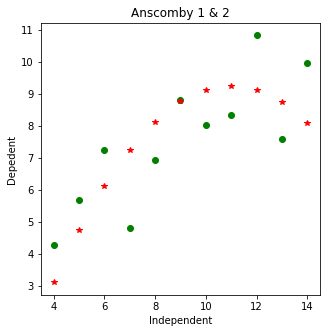

In [8]:
pl.figure(figsize=(5,5))
pl.plot(df['x'], df['y1'], 'go')
pl.plot(df['x'], df['y2'], 'r*')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 & 2');

# First Anscomby distribution: y1

## OLS linear fit  y1~x

In [9]:
OLS1 = smf.ols(formula='y1  ~ x', data=df).fit()
OLS1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 27 Nov 2018   Prob (F-statistic):            0.00217
Time:                        16:23:22   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026         0.456     5.544
x              0.5001      0.118      4.241      0.002         0.233     0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

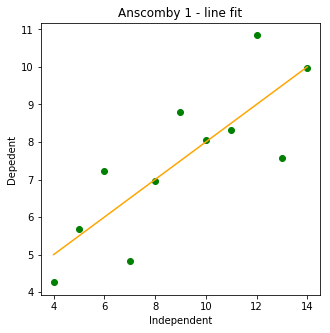

In [10]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS1.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - line fit');

## OLS quadratic fit  y1~x^2 + x

In [11]:
# create a new feature for x^2
df['x2'] = df['x']**2

In [12]:
OLS2 = smf.ols(formula='y1 ~ x2 + x',data=df).fit()
OLS2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Tue, 27 Nov 2018   Prob (F-statistic):            0.00956
Time:                        16:23:22   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.824        -6.827     8.338
x2            -0.0316      0.043     -0.729      0.487        -0.132     0.068
x              1.0693      0.790      1.354      0.213        -0.752     2.891
==============================================================================
Omnibus:                        0.167   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.302
Skew:                          -0.220   Prob(JB):                        0.860
Kurtosis:                       2.318   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

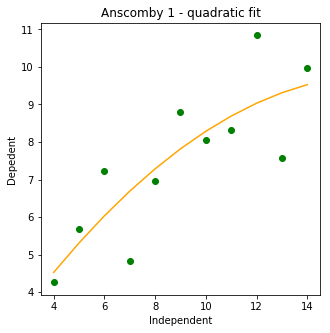

In [13]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS2.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - quadratic fit');

# Compare the models with the LR ratio test

In [14]:
OLS2.compare_lr_test(OLS1)

(0.70794919019374447, 0.40012547285804223, 1.0)

# HW

## 1. Write down in words what this result means

Test description from Wikipedia:
- In statistics, a likelihood ratio test (LR test) is a statistical test used for comparing the goodness of fit of two statistical models — a null model against an alternative model. The test is based on the likelihood ratio, which expresses how many times more likely the data are under one model than the other. This likelihood ratio, or equivalently its logarithm, can then be used to compute a p-value, or compared to a critical value to decide whether or not to reject the null model. 

Interpretation:
- The p-value is high, so we fail to reject the null that the linear model is better. In other words, we should prefer the linear model as it has higher Likelihood (given my observations, it is more probable that the data I observed is generated by a process such as the one described by the OLS1 model)

## 2. Do the same for the other series of data (y2)

In [15]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6,x2
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50,16.0
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89,25.0
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25,36.0
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91,49.0
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76,64.0
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84,81.0
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58,100.0
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47,121.0
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56,144.0
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71,169.0


In [16]:
# Linear model for second Anscombes distribution

OLS3 = smf.ols(formula='y2  ~ x', data=df).fit()
OLS3.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Tue, 27 Nov 2018   Prob (F-statistic):            0.00218
Time:                        16:23:22   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026         0.455     5.547
x              0.5000      0.118      4.239      0.002         0.233     0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

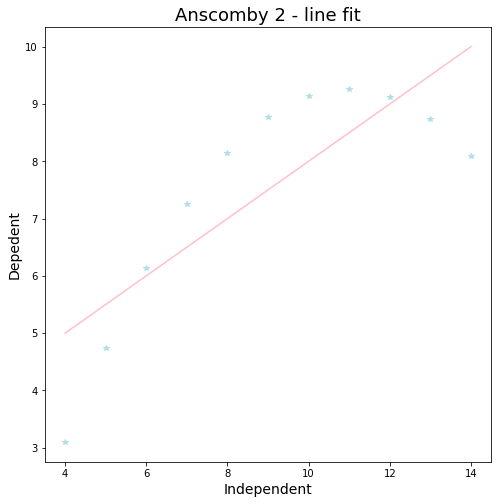

In [17]:
# plot the data and the model fit 

pl.figure(figsize=(8,8))
pl.plot(df['x'],df['y2'],'r*', color='powderblue')
pl.plot(df['x'], OLS3.predict(df),'-', color='pink')
pl.xlabel('Independent', fontsize=14)
pl.ylabel('Depedent', fontsize=14)
pl.title('Anscomby 2 - line fit', fontsize=18);

Figure 1 - Anscomby distribution 2, linear fit. The data seems more quadratic than the first dataset and the linear model does not seem like the best at the first glance. The value of R-squared from the table above seems to be about the same as what we got for both models for the first dataset. Let's move onto a quadratic model to see if it would fit the data better.

In [18]:
OLS4 = smf.ols(formula='y2 ~ x2 + x',data=df).fit()
OLS4.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        16:23:22   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.000        -6.006    -5.986
x2            -0.1267   5.71e-05  -2219.238      0.000        -0.127    -0.127
x              2.7808      0.001   2673.741      0.000         2.778     2.783
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.697
Skew:                           0.809   Prob(JB):                        0.428
Kurtosis:                       1.959   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

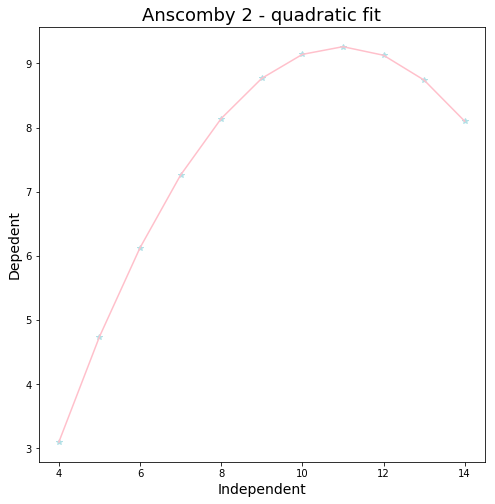

In [19]:
# plot the data and the model fit 

pl.figure(figsize=(8,8))
pl.plot(df['x'],df['y2'],'r*', color='powderblue')
pl.plot(df['x'], OLS4.predict(df),'-', color='pink')
pl.xlabel('Independent', fontsize=14)
pl.ylabel('Depedent', fontsize=14)
pl.title('Anscomby 2 - quadratic fit', fontsize=18);

Figure 2 - Anscomby distribution 2, quadratic fit. Looks like this model fits data exteremely well. The R-squared stastistic of 1 confirms that this model is seemingly "perfect". Is it though? Perhaps, the model is sufferring from overfitting. Let's do a Likelihood-ratio test to see what model is better, from likelihood perspective. 

In [20]:
OLS4.compare_lr_test(OLS3)

(146.63437980392047, 9.4331834208378821e-34, 1.0)

Interpretation:
- The p-value is high, so we fail to reject the null that the linear model is better. In other words, we should prefer the linear model as it has higher Likelihood (given my observations, it is more probable that the data I observed is generated by a process such as the one described by the OLS3 model)


## 3. Use the value of the likelihood which you can find in the models summary and the formula for the likelihood ration in the slides to derive the same result: you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value

# chi sq table for your convenience

![chi sq table](chisq.gif)

Equation of LR:
    
    LR = -2 log (Likelihood_restricted / likelihood_complex)
    
or equivalently

    LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

where log is the natural log (base e)

In [21]:
log_likelihood_restricted = -16.846
log_likelihood_complex = 56.471

LR = -2*(log_likelihood_restricted - log_likelihood_complex)
print('The Chi-Sq statistics is:', LR)


The Chi-Sq statistics is: 146.634


The number for the statistic is not in the table, but we can infer that the p-value associated to it would be infinitely close to 1. This confirms calculations we obtained while using statsmodels packages. 